# CITS4403 Slime Mould Project
## Wenxiao Zhang - 22792191

## Import libraries

In [241]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from slime.city import City
import pandas as pd
import networkx as nx


## Load and preprocess the dataset 

In [243]:
stations = gpd.read_file('database/nanjing_nodes.geojson')
routes = gpd.read_file('database/nanjing_edges.geojson')
# drop irrelevant columns and null value
stations = stations.drop(['name', 'marker-symbol', 'marker-size'], axis=1)
routes = routes.drop(['name', 'ref'], axis=1)
stations = stations[~stations['marker-color'].isnull()].reset_index().drop(['index'], axis=1)
# gpd.options.display_precision = 4
# fig, ax = plt.subplots(figsize=(10, 10))
# stations.plot(ax=ax, column=stations['marker-color'], zorder=2)
# routes.plot(ax=ax, column='stroke', zorder=1)
# plt.show()

### Preprocess nodes

In [244]:
stations['lon'], stations['lat'] = stations.geometry.x, stations.geometry.y
stations['value'] = 4
min_lon = min(stations['lon'])
min_lat = min(stations['lat'])
# scaling lon lat values
stations['x'] = stations.lon.apply(lambda x: int((x - min_lon) * (10**3)))
stations['y'] = stations.lat.apply(lambda y: int((y - min_lat) * (10**3)))
# subset the data
stations = stations[((stations['x']>150) & (stations['x']<500)) & ((stations['y']>530) & (stations['y']<800))].reset_index().drop(['index'], axis=1)
min_x = min(stations['x'])
min_y = min(stations['y'])
stations['x'] = stations.x.apply(lambda x: int(x - min_x)+10)
stations['y'] = stations.y.apply(lambda y: int(y - min_y)+10)
stations['nodes'] = stations[['x', 'y']].apply(tuple, axis=1)
stations.head()

,marker-color,geometry,lon,lat,value,x,y,nodes
0,#797979,POINT (119 32),118.863858,32.041670,4,201,163,"(201, 163)"
1,#797979,POINT (119 32),118.779027,32.052965,4,116,174,"(116, 174)"
2,#797979,POINT (119 32),118.982163,32.086573,4,320,208,"(320, 208)"
3,#ff2600,POINT (119 32),118.789430,32.044122,4,127,166,"(127, 166)"
4,#ff2600,POINT (119 32),118.714278,31.967809,4,52,89,"(52, 89)"


### Preprocess edges

In [245]:
# routes['points'] = routes.apply(lambda l: l['geometry'].coords, axis=1)
# routes['edges'] = routes.points.apply(lambda r: [(int((x - min_lon) * (10**3)), int((y - min_lat) * (10**3))) for x,y in r])
# routes['edges'] = routes.edges.apply(lambda r: [(x,y) for x,y in r if x>150 and x<500 and y>530 and y<800])
# routes['edges'] = routes.edges.apply(lambda r: [(int((x - min_x)+10), int((y - min_y)+10)) for x,y in r])
# routes['edges'] = routes.edges.apply(lambda r: [(x,y) for x,y in r if x>0 and y>0 and (x,y) in stations['nodes']])
# routes = routes[routes.edges.apply(lambda r: len(r)!=0)].reset_index().drop(['index'], axis=1)
# routes

## Create a graph

In [132]:
G = nx.Graph()
G.add_nodes_from(stations['nodes'])

In [7]:
start_loc = (stations.at[20,'x'], stations.at[20,'y'])
start_loc

(159, 252)

In [8]:
city = City(city_shape=(max(stations.x) + 50, max(stations.y) + 50), foods=stations, start_loc=start_loc, mould_shape=(5, 5), init_mould_coverage=1, decay=0.2)

(83, 20)
(89, 20)
(165, 83)
(111, 20)
(171, 165)
(114, 83)
(12, 111)
(89, 114)
(93, 111)
(164, 111)
(12, 93)
(9, 89)
(164, 12)
(102, 164)
(116, 9)
(40, 116)
(156, 9)
(143, 156)
(6, 116)
(74, 143)
(118, 114)
(1, 156)
(160, 74)
(4, 6)
(109, 4)
(76, 109)
(170, 1)
(138, 76)
(67, 138)
(61, 170)
(81, 109)
(98, 102)
(33, 67)
(56, 81)
(121, 33)
(130, 81)
(101, 61)
(0, 121)


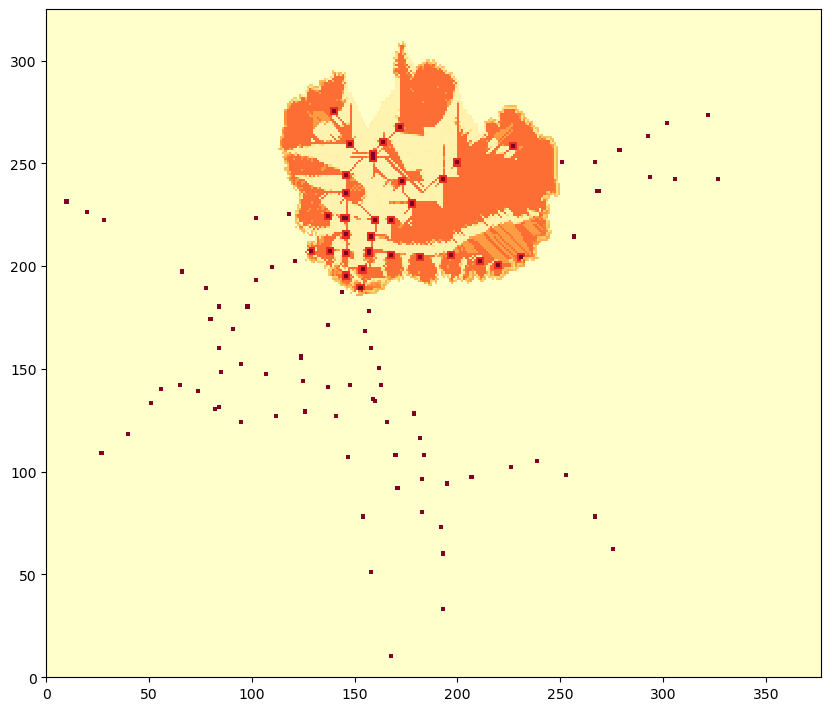

In [9]:
city.animate(frames=100, interval=100, filename="output/test2.gif")
plt.show()

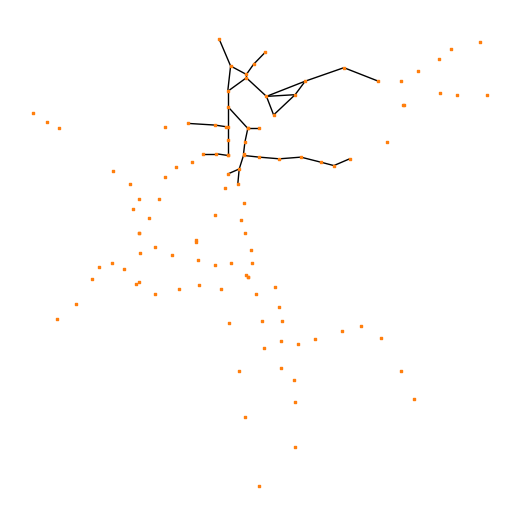

In [10]:
fig = plt.figure(figsize=(5, 5))
nx.draw(city.food_graph, city.food_positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2, 
        with_labels=False)

(80, 130)
(32, 56)
(169, 101)
(22, 98)
(37, 0)
(50, 80)
(153, 98)
(22, 153)
(24, 22)
(78, 169)
(84, 50)
(125, 24)
(113, 160)
(10, 78)
(72, 153)
(125, 72)
(91, 84)
(27, 10)
(133, 32)
(57, 10)
(68, 91)
(49, 10)
(135, 72)
(16, 125)
(172, 68)
(142, 172)
(44, 135)
(95, 142)
(139, 142)
(18, 95)
(8, 57)
(54, 133)
(13, 172)
(82, 54)
(141, 8)
(117, 16)
(31, 8)
(162, 44)
(108, 13)
(120, 18)
(166, 18)
(48, 141)
(7, 82)
(27, 8)
(167, 108)
(124, 48)
(106, 141)
(105, 166)
(58, 106)
(47, 105)
(100, 48)
(129, 105)
(120, 129)
(147, 129)
(26, 105)
(134, 7)
(92, 26)
(159, 92)
(49, 27)
(30, 120)
(132, 167)
(90, 134)
(55, 26)
(70, 100)
(5, 70)
(36, 70)
(14, 26)
(45, 14)
(122, 45)
(29, 5)
(53, 29)
(168, 49)
(151, 53)
(154, 55)
(158, 30)
(115, 116)
(148, 151)
(65, 154)
(21, 148)
(150, 122)
(59, 150)
(131, 21)
(99, 168)


KeyboardInterrupt: 

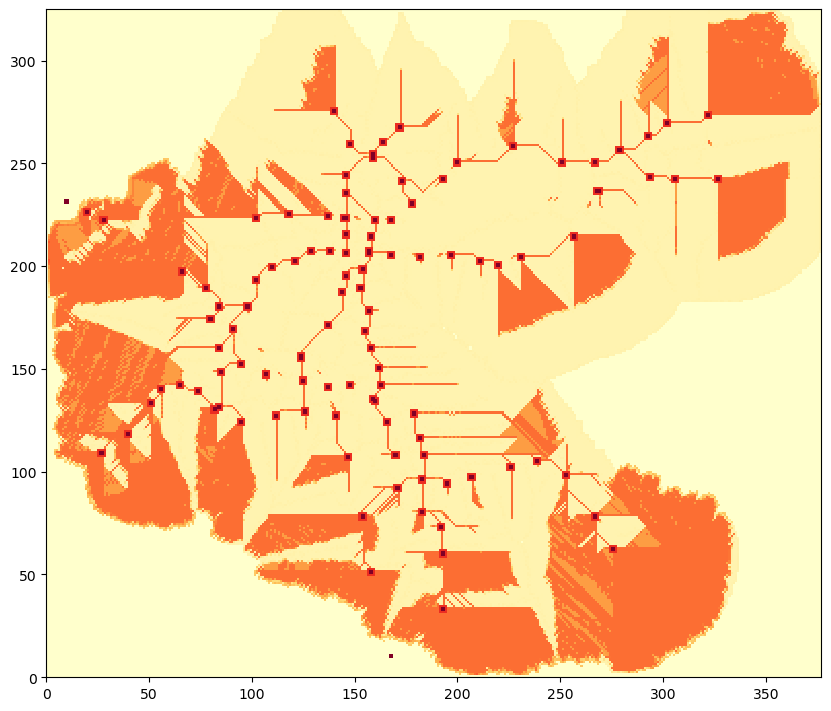

In [11]:
city.animate(frames=500, interval=100, filename="output/test3.gif")
plt.show()

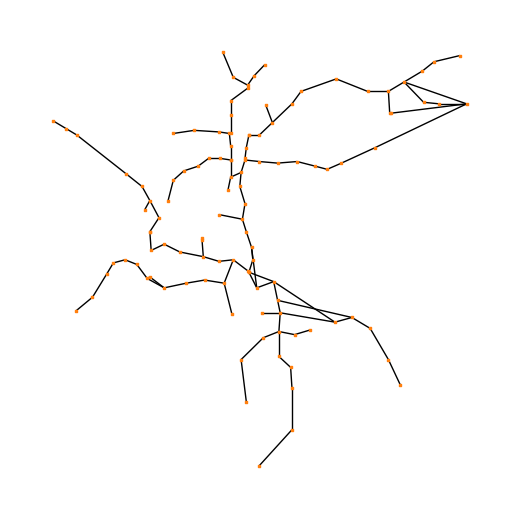

In [ ]:
fig = plt.figure(figsize=(5, 5))
nx.draw(city.food_graph, city.food_positions, 
        node_color='C1', 
        node_shape='s', 
        node_size=2, 
        with_labels=False)